<a href="https://colab.research.google.com/github/yucaret/Data_Analysis/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/"My Drive"/Iniciativas/20231203_globant

Mounted at /content/drive
/content/drive/My Drive/Iniciativas/20231203_globant


In [3]:
import pandas as pd
import numpy as np

# Data upload

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

# data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

# metadata
print(diabetes_130_us_hospitals_for_years_1999_2008.metadata)

# variable information
print(diabetes_130_us_hospitals_for_years_1999_2008.variables)

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 296, 'name': 'Diabetes 130-US hospitals for years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide pro

In [6]:
X.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    3197 non-null    object
 4   admission_type_id         101766 non-null  int64 
 5   discharge_disposition_id  101766 non-null  int64 
 6   admission_source_id       101766 non-null  int64 
 7   time_in_hospital          101766 non-null  int64 
 8   payer_code                61510 non-null   object
 9   medical_specialty         51817 non-null   object
 10  num_lab_procedures        101766 non-null  int64 
 11  num_procedures            101766 non-null  int64 
 12  num_medications           101766 non-null  int64 
 13  number_outpatient         101766 non-null  int64 
 14  numb

In [8]:
y.head()

,readmitted
0,NO
1,>30
2,NO
3,NO
4,NO


In [9]:
X.shape

(101766, 47)

In [10]:
y.shape

(101766, 1)

In [11]:
df = pd.concat([X, y], axis=1)

In [12]:
df.shape

(101766, 48)

# Data Transformation and Exploration

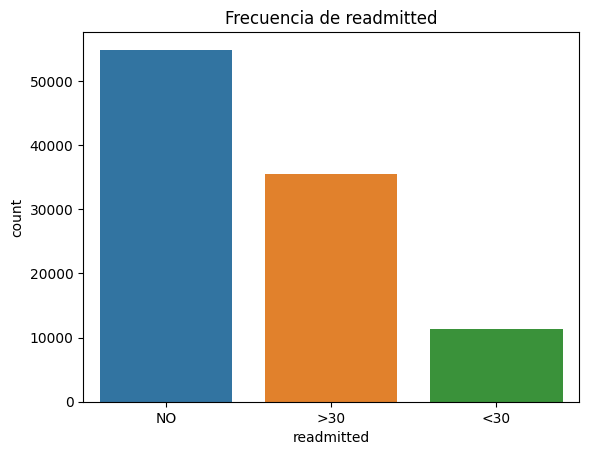

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que df es tu DataFrame

# Gráfico de barras para la variable categórica "readmitted"
sns.countplot(x='readmitted', data=df)
plt.title('Frecuencia de readmitted')
plt.show()

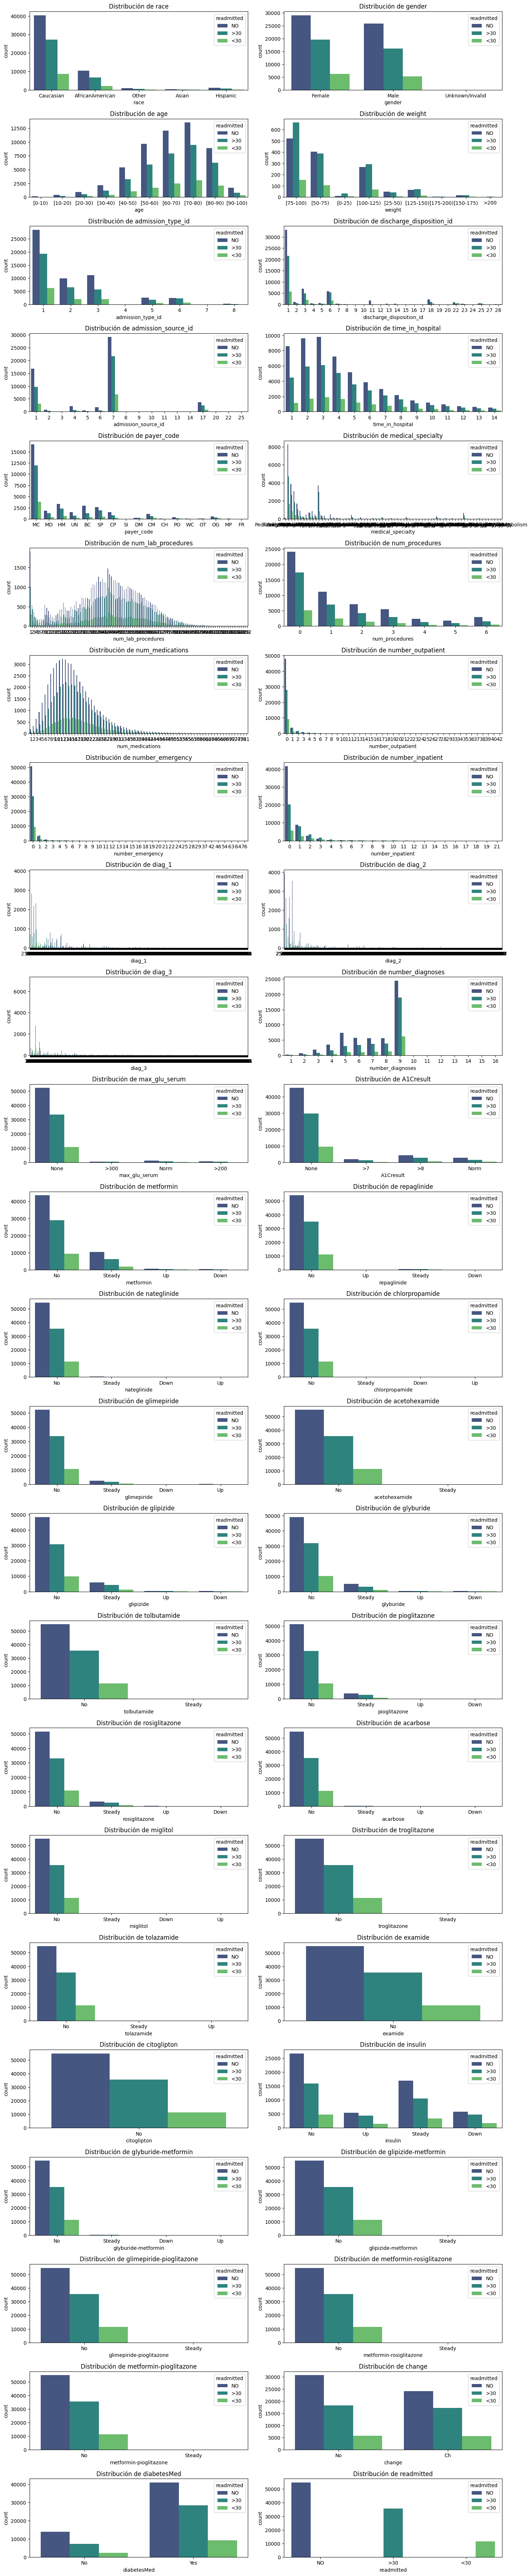

In [ ]:
# Establecer el tamaño del gráfico
plt.figure(figsize=(15, 150))

# Crear subgráficos para cada columna cualitativa
for i, column in enumerate(df.columns, 1):
  plt.subplot(50, 2, i)
  sns.countplot(x=column, hue='readmitted', data=df, palette='viridis')
  plt.title(f'Distribución de {column}')

# Ajustar el diseño del gráfico
plt.tight_layout()
plt.show()

In [16]:
df[['diag_1']].tail(10)

,diag_1
101756,996
101757,491
101758,292
101759,435
101760,345
101761,250.13
101762,560
101763,38
101764,996
101765,530


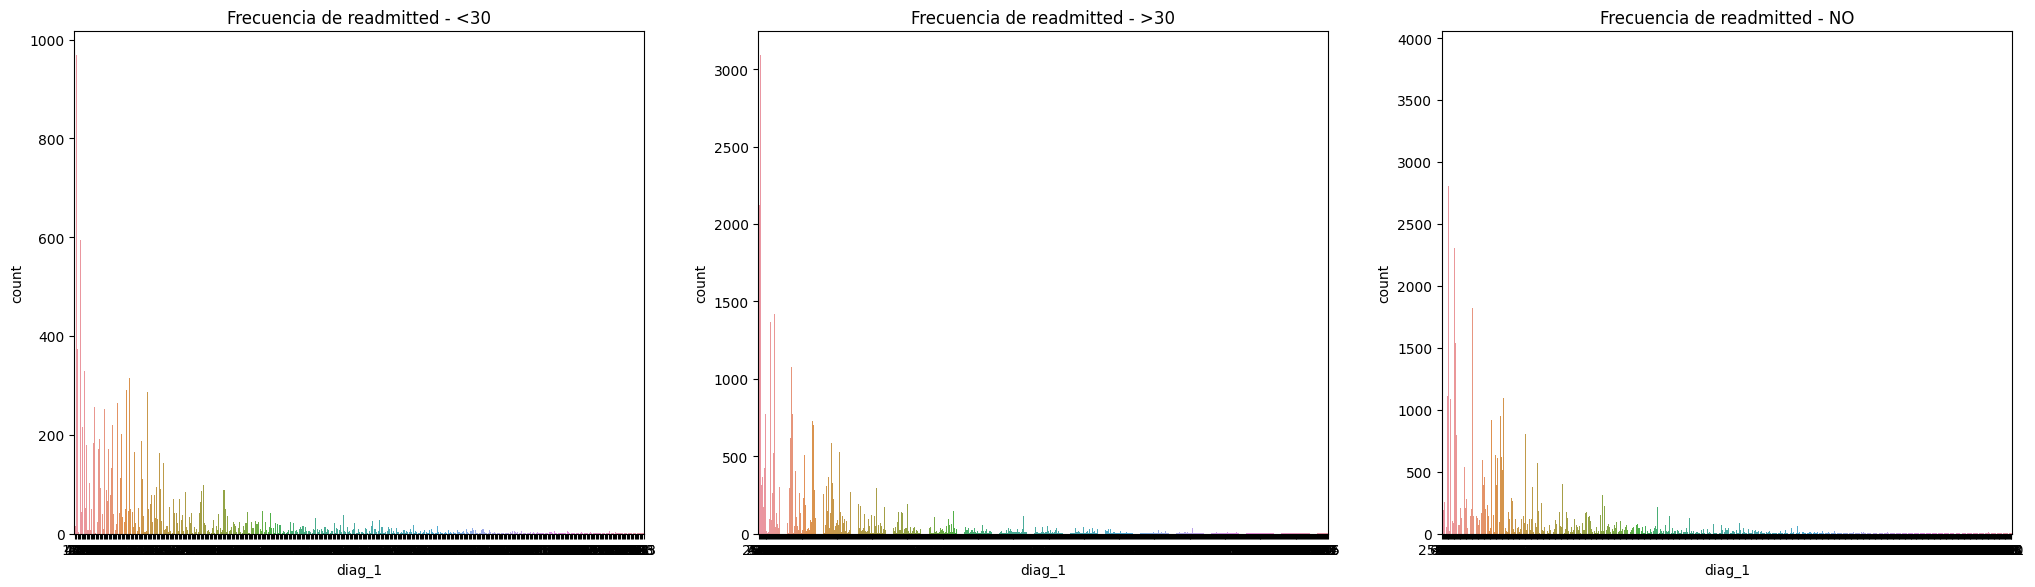

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 30))

# Supongamos que df es tu DataFrame
plt.subplot(4, 3, 1)
sns.countplot(x='diag_1', data=df[df['readmitted'] ==  '<30'])
plt.title('Frecuencia de readmitted - <30')

plt.subplot(4, 3, 2)
sns.countplot(x='diag_1', data=df[df['readmitted'] ==  '>30'])
plt.title('Frecuencia de readmitted - >30')

plt.subplot(4, 3, 3)
sns.countplot(x='diag_1', data=df[df['readmitted'] ==  'NO'])
plt.title('Frecuencia de readmitted - NO')

plt.show()

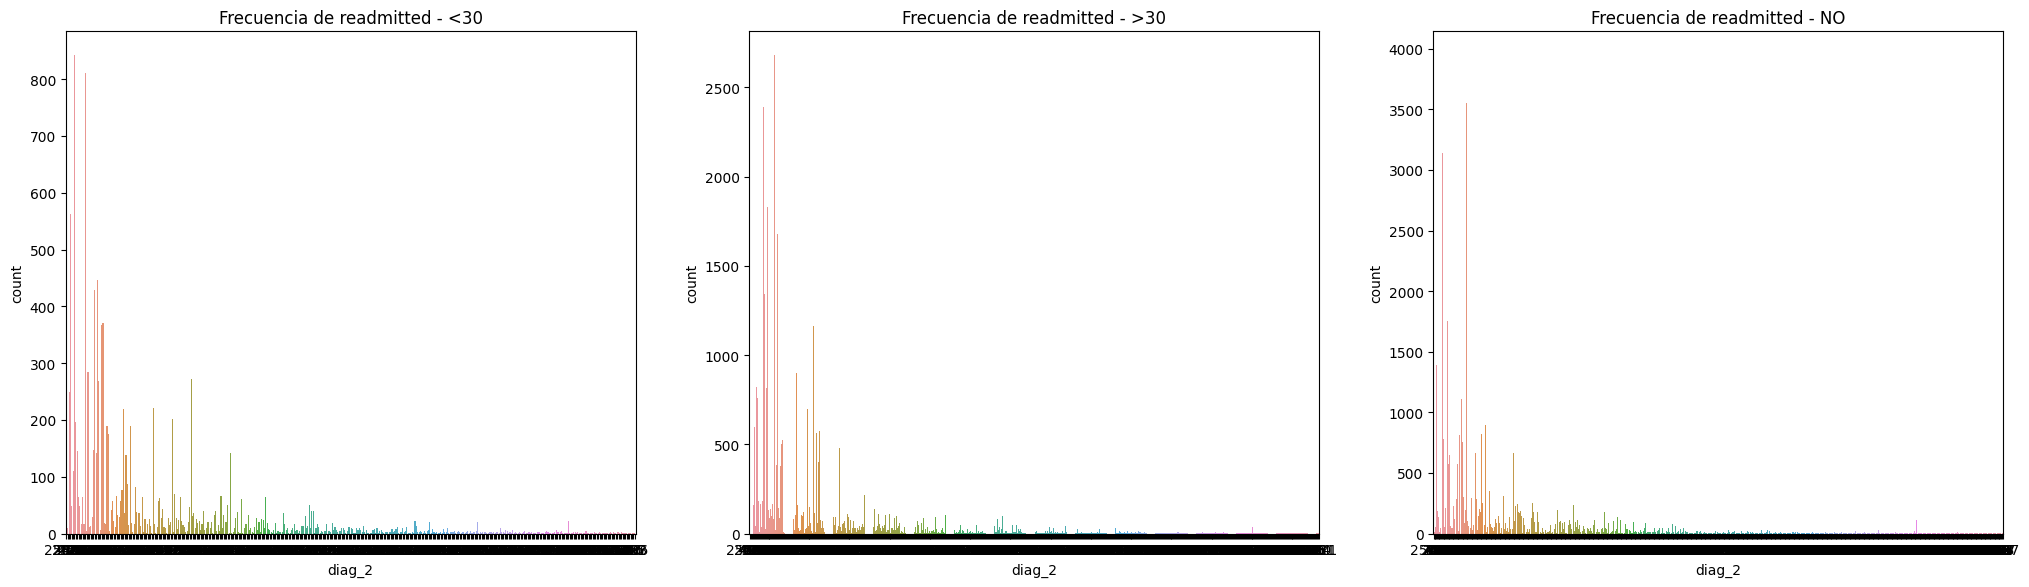

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 30))

# Supongamos que df es tu DataFrame
plt.subplot(4, 3, 1)
sns.countplot(x='diag_2', data=df[df['readmitted'] ==  '<30'])
plt.title('Frecuencia de readmitted - <30')

plt.subplot(4, 3, 2)
sns.countplot(x='diag_2', data=df[df['readmitted'] ==  '>30'])
plt.title('Frecuencia de readmitted - >30')

plt.subplot(4, 3, 3)
sns.countplot(x='diag_2', data=df[df['readmitted'] ==  'NO'])
plt.title('Frecuencia de readmitted - NO')

plt.show()

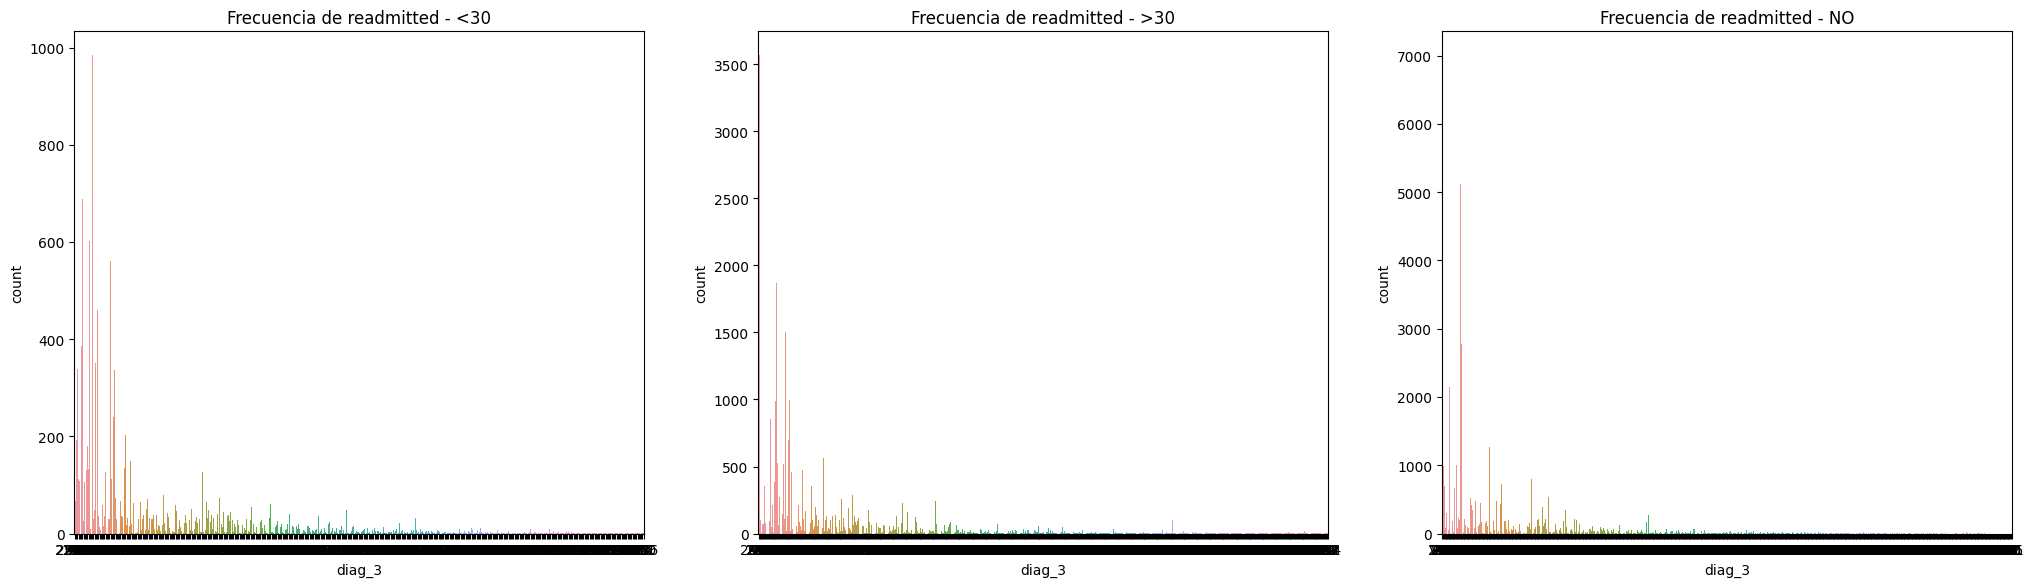

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 30))

# Supongamos que df es tu DataFrame
plt.subplot(4, 3, 1)
sns.countplot(x='diag_3', data=df[df['readmitted'] ==  '<30'])
plt.title('Frecuencia de readmitted - <30')

plt.subplot(4, 3, 2)
sns.countplot(x='diag_3', data=df[df['readmitted'] ==  '>30'])
plt.title('Frecuencia de readmitted - >30')

plt.subplot(4, 3, 3)
sns.countplot(x='diag_3', data=df[df['readmitted'] ==  'NO'])
plt.title('Frecuencia de readmitted - NO')

plt.show()

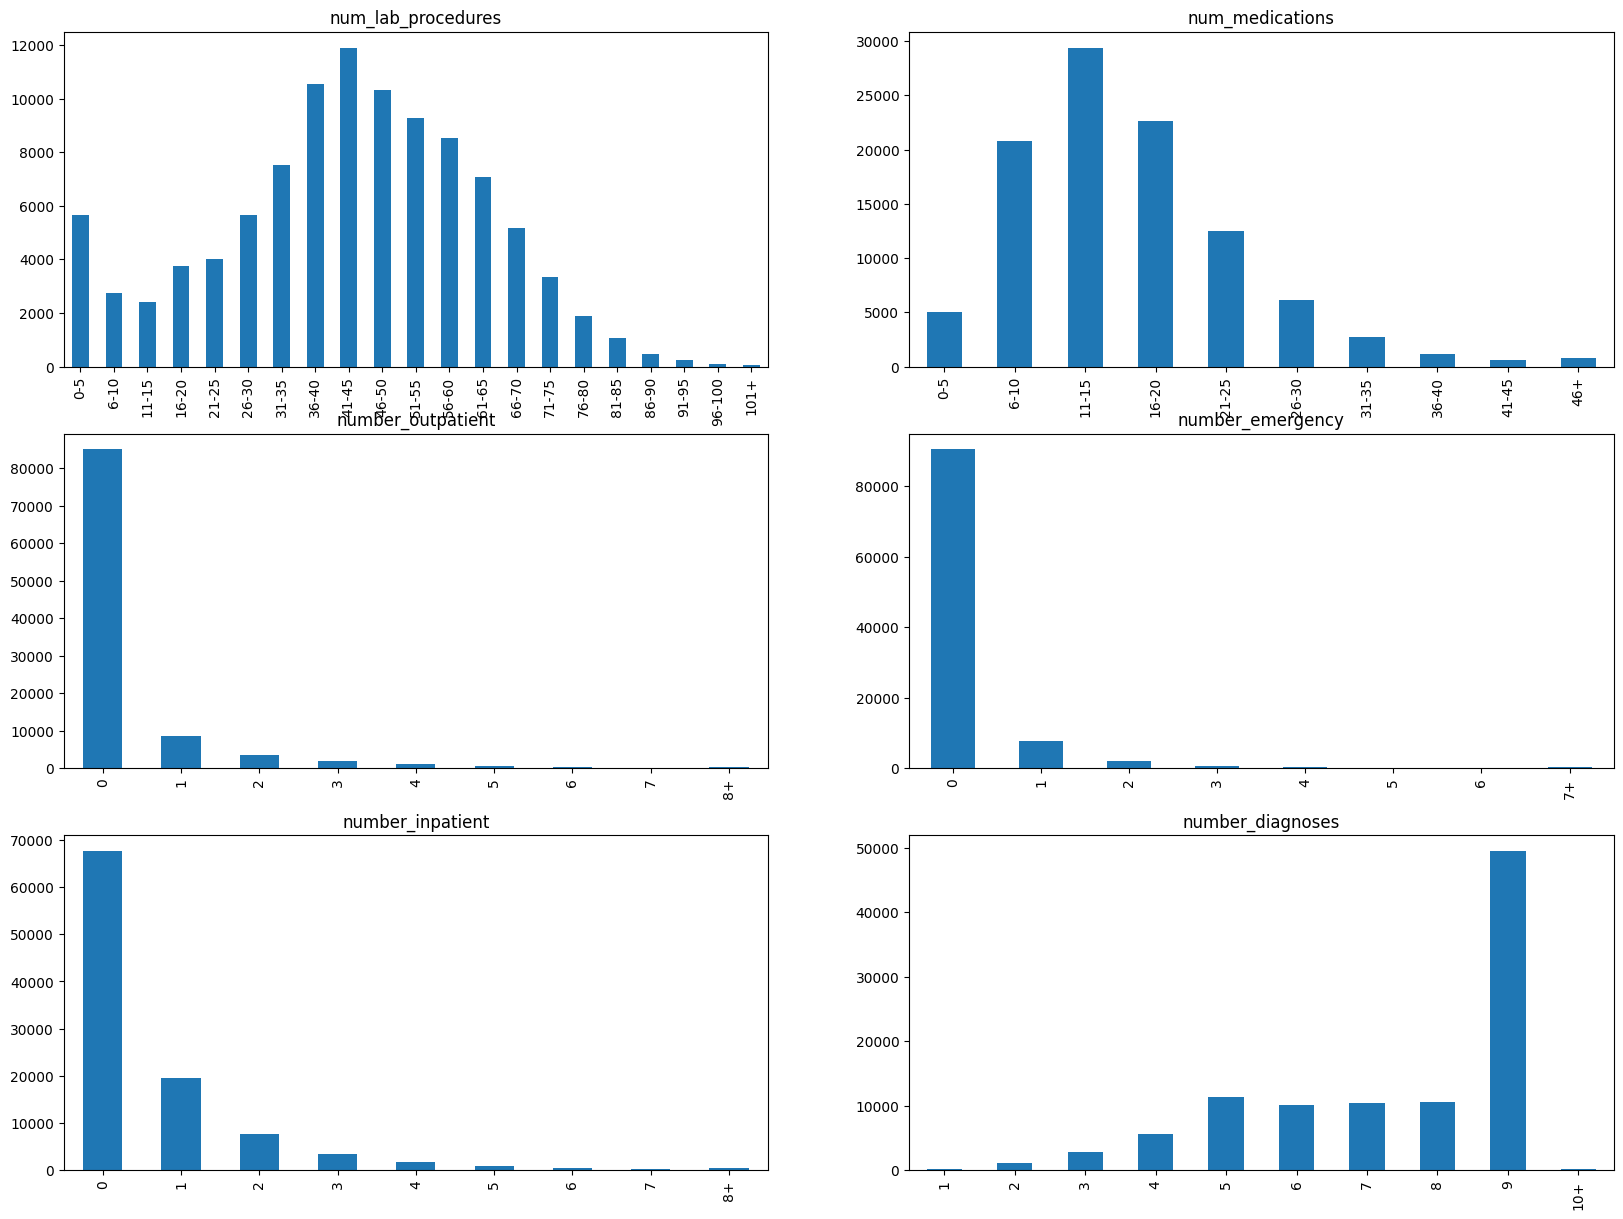

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

rangos = [
['num_lab_procedures',
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, float('inf')],
['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-80', '81-85', '86-90', '91-95', '96-100', '101+']
],
['num_medications',
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, float('inf')],
['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46+']
],
['number_outpatient',
#[-1,0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, float('inf')],
#['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16+']
[-1,  0,   1,   2,   3,   4,   5,   6,    7, float('inf')],
['0', '1', '2', '3', '4', '5', '6', '7', '8+']
],
['number_emergency',
[-1,0, 1, 2, 3, 4, 5, 6, float('inf')],
['0','1', '2', '3', '4', '5', '6', '7+']
],
['number_inpatient',
[-1,0, 1, 2, 3, 4, 5, 6, 7, float('inf')],
['0', '1','2', '3', '4', '5','6', '7', '8+']
],
['number_diagnoses',
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, float('inf')],
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']
]
]

categorical_columns = []

for i, valores in enumerate(rangos, 0):
  categorical_columns.append(valores[0])

df_range = df[categorical_columns].copy()

for i, valores in enumerate(rangos, 0):
  categorical_column = valores[0]
  bins =  valores[1]
  labels =  valores[2]
  df_range[categorical_column + ' Range'] = pd.cut(df_range[categorical_column], bins=bins, labels=labels)


# Establecer el tamaño del gráfico
plt.figure(figsize=(20, 20))

# Visualiza las frecuencias de los rangos
for i, categorical_column in enumerate(categorical_columns, 1):
  plt.subplot(4, 2, i)
  df_range[categorical_column + ' Range'].value_counts().sort_index().plot(kind='bar')
  plt.title(categorical_column)
plt.show()

In [ ]:
df_range.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   num_lab_procedures        101766 non-null  int64   
 1   num_medications           101766 non-null  int64   
 2   number_outpatient         101766 non-null  int64   
 3   number_emergency          101766 non-null  int64   
 4   number_inpatient          101766 non-null  int64   
 5   number_diagnoses          101766 non-null  int64   
 6   num_lab_procedures Range  101766 non-null  category
 7   num_medications Range     101766 non-null  category
 8   number_outpatient Range   101766 non-null  category
 9   number_emergency Range    101766 non-null  category
 10  number_inpatient Range    101766 non-null  category
 11  number_diagnoses Range    101766 non-null  category
dtypes: category(6), int64(6)
memory usage: 5.2 MB


In [ ]:
df[df['number_outpatient'] == 0][['number_outpatient']].count()

number_outpatient    85027
dtype: int64

In [ ]:
df[df['number_outpatient'] != 0][['number_outpatient']].count()

number_outpatient    16739
dtype: int64

In [ ]:
df_range = df_range.drop(columns = categorical_columns)

In [ ]:
df_range_dummies = pd.get_dummies(df_range, dummy_na=True)

In [ ]:
df_range_dummies.head()

,num_lab_procedures Range_0-5,num_lab_procedures Range_6-10,num_lab_procedures Range_11-15,num_lab_procedures Range_16-20,num_lab_procedures Range_21-25,num_lab_procedures Range_26-30,num_lab_procedures Range_31-35,num_lab_procedures Range_36-40,num_lab_procedures Range_41-45,num_lab_procedures Range_46-50,...,number_diagnoses Range_2,number_diagnoses Range_3,number_diagnoses Range_4,number_diagnoses Range_5,number_diagnoses Range_6,number_diagnoses Range_7,number_diagnoses Range_8,number_diagnoses Range_9,number_diagnoses Range_10+,number_diagnoses Range_nan
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_features = X.drop(columns = (categorical_columns + ['diag_1', 'diag_2', 'diag_3']))

In [ ]:
df_features['admission_type_id'] = df_features['admission_type_id'].astype(str)
df_features['discharge_disposition_id'] = df_features['discharge_disposition_id'].astype(str)
df_features['admission_source_id'] = df_features['admission_source_id'].astype(str)
df_features['time_in_hospital'] = df_features['time_in_hospital'].astype(str)
df_features['num_procedures'] = df_features['num_procedures'].astype(str)

In [ ]:
df_features_dummies = pd.get_dummies(df_features, dummy_na=True)

In [ ]:
df_features_dummies.head()

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_nan,gender_Female,gender_Male,gender_Unknown/Invalid,gender_nan,...,metformin-rosiglitazone_nan,metformin-pioglitazone_No,metformin-pioglitazone_Steady,metformin-pioglitazone_nan,change_Ch,change_No,change_nan,diabetesMed_No,diabetesMed_Yes,diabetesMed_nan
0,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0


In [ ]:
X_new = pd.concat([df_features_dummies, df_range_dummies], axis=1)

In [ ]:
X_new.head()

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_nan,gender_Female,gender_Male,gender_Unknown/Invalid,gender_nan,...,number_diagnoses Range_2,number_diagnoses Range_3,number_diagnoses Range_4,number_diagnoses Range_5,number_diagnoses Range_6,number_diagnoses Range_7,number_diagnoses Range_8,number_diagnoses Range_9,number_diagnoses Range_10+,number_diagnoses Range_nan
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
y.head()

,readmitted
0,NO
1,>30
2,NO
3,NO
4,NO


In [ ]:
mapping = {'NO': 0, '<30': 1, '>30': 2}

y_encoded = pd.DataFrame(data = y['readmitted'].map(mapping), columns = ['readmitted'])

# Training Model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_new, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

<ipython-input-40-6b5918d5b0df>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = model.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Accuracy on validation set: {accuracy}')

Accuracy on validation set: 0.5819849328529315


In [ ]:
# Ejemplo de búsqueda de hiperparámetros utilizando GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

# Mejores hiperparámetros
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Best hyperparameters: {'max_depth': 20, 'n_estimators': 200}


In [ ]:
y_test_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on test set: {test_accuracy}')

Accuracy on test set: 0.5840157222404193


In [ ]:
import joblib

joblib.dump(best_model, './2_model/diabetes_best_model.pkl')

['./2_model/diabetes_best_model.pkl']

In [ ]:
best_model = joblib.load('./2_model/diabetes_best_model.pkl')

In [ ]:
feature_names = X_new.columns

feature_importances = best_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
feature_importance_df.head(10)

,Feature,Importance
361,number_inpatient Range_0,0.061843
42,discharge_disposition_id_11,0.027892
352,number_emergency Range_0,0.019954
342,number_outpatient Range_0,0.017033
363,number_inpatient Range_2,0.016955
362,number_inpatient Range_1,0.015872
379,number_diagnoses Range_9,0.014368
81,admission_source_id_7,0.011942
40,discharge_disposition_id_1,0.011500
191,num_procedures_0,0.010831


#